<a href="https://colab.research.google.com/github/Hessa85/Attendance-Security-System/blob/master/Attendance_Security_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#creating Folder called Attendance Security System and then uploading the images inside it

!mkdir Attendance_Security_System

In [0]:
# moving the sub folders in Data folder

#mv Marlon_Brando Robert_DeNiro Data

In [0]:
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as im

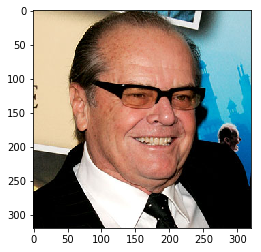

In [111]:
# reading and loading the images 

img = im.imread("Attendance_Security_System/Jack1.jpg")
plt.imshow(img)
plt.show()

In [112]:
img.shape

(320, 320, 3)

In [113]:
# get dimensions of image
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (320, 320, 3)
Image Height       :  320
Image Width        :  320
Number of Channels :  3


In [0]:
# resizing the images because they are in different sizes and features(colored and gray)

#face detection

fd = cv2.CascadeClassifier("Attendance_Security_System/haarcascade_frontalface_alt.xml")
def get_face(img):
    if len(img.shape) ==3:
        img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    corners = fd.detectMultiScale(img,1.3,4)
    if len(corners)==0:
        return None,None
    else:
        (x,y,w,h) = corners[0]
        img = img[y-20:y+h+20,x-20:x+w+20] # cropping the image
        img = cv2.resize(img,(100,100))
        return img


# New Section

In [134]:
# loading the images from the file

import os
folder = "Attendance_Security_System"
files= os.listdir(folder)
#subfolder = os.listdir(folder)
trainimg = []
trainlb = []
def loadimage (path):
  img= im.imread(path,"PNG")
  return img
for filename in files:
  if "xml" not in filename:
    image= loadimage(folder + '/' + filename)
    img= get_face (image)
    if corner != None:
      trainimg.append (img)
      trainlb.append (filename [0])
  print (filename) #Printing all the files inside the folders 

Jack1.jpg
Jack2.jpg
Marlon3.jpg
Marlon4.jpg
Marlon2.jpg
Robert3.jpg
Robert1.jpg
haarcascade_frontalface_alt.xml
Marlon1.jpg
Robert4.jpg
Jack3.png
Jack4.jpg
Robert2.jpg


In [43]:
# calling the files for testing purpose

files

['Jack1.jpg',
 'Jack2.jpg',
 'Marlon3.jpg',
 'Marlon4.jpg',
 'Marlon2.jpg',
 'Robert3.jpg',
 'Robert1.jpg',
 'haarcascade_frontalface_alt.xml',
 'Marlon1.jpg',
 'Robert4.jpg',
 'Jack3.png',
 'Jack4.jpg',
 'Robert2.jpg']

In [115]:
trainimg [2].shape

(100, 100)

In [84]:
#train the images as they are in different shapes (array) 

#trainimg= np.matrix (trainimg)
#trainimg.shape

(1, 12)

In [0]:
#del(trainlb[5])


In [0]:
def find_face(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # BGR to RGB
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j,0]>140 and img[i,j,1]<150 and img[i,j,2]<150:
                img[i,j,:]=255
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img

In [136]:
trainimg= np.array(trainimg)
trainlb = np.array(trainlb)
print(trainimg.shape)
print(trainlb.shape)

(12, 100, 100)
(12,)


In [0]:
# building the model using Keras

from keras import backend
backend.set_image_data_format("channels_first")

In [0]:
# Building the model
from keras import models,layers
model = models.Sequential()
# add first convolutional and maxpooling layer
model.add(layers.Conv2D(filters=20,kernel_size=(3,3),activation = 'relu',
                        input_shape = (1,100,100)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# add the second convolutional layer
model.add(layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#add the flatten layer
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [140]:
# train the model
model.fit(trainimg,trainlb,epochs=20,batch_size=5,shuffle=True,
          verbose=True,validation_split=0.2)

ValueError: ignored

In [129]:
# preprocessing the images
# scale the images
trainimg = trainimg/255

# reshape the image data
trainimg = trainimg.reshape(1,12,100,100)

# onehot encode the labels
from sklearn.preprocessing import OneHotEncoder
trainlb = OneHotEncoder().fit_transform(trainlb.reshape(12,1)).toarray()

print(trainimg.shape)
print(trainlb.shape)

ValueError: ignored

In [0]:
labels = ["Happy","Normal","Sad"]

In [76]:
vid = cv2.VideoCapture(0)
while True:
    ret,img = vid.read()
    img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    corner,img2 = get_face(img2)
    if corner!=None:
        (x,y,w,h)=corner
        output = model.predict_classes(img2.reshape(1,1,100,100))
        emotion = labels[output[0]]
        cv2.putText(img,emotion,(x,y),cv2.FONT_HERSHEY_COMPLEX,
                    1.0,(0,0,255),2)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
    cv2.imshow("img",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

error: ignored